<a href="https://colab.research.google.com/github/nadeem1615/Data_Science_/blob/main/ds_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')

print(df.isnull().sum())

X = df.drop(['ID', 'Personal Loan', 'ZIP Code'], axis=1)
y = df['Personal Loan']

num_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


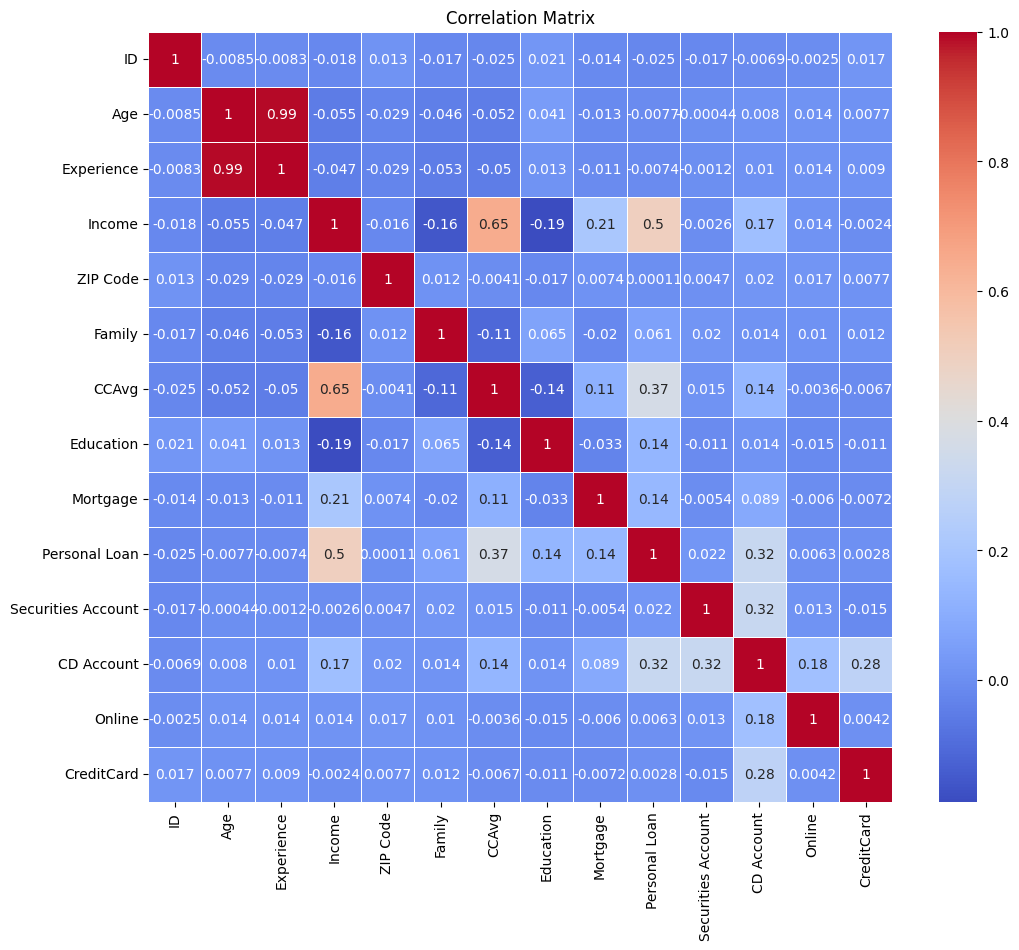

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
lr.fit(X_train, y_train)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rf}
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    print(f"{name}:")
    print("  Accuracy:", accuracy_score(y_test, y_pred))
    print("  Precision:", precision_score(y_test, y_pred))
    print("  Recall:", recall_score(y_test, y_pred))
    print("  F1 Score:", f1_score(y_test, y_pred))
    print("  ROC-AUC:", roc_auc_score(y_test, y_prob))
    print()


Logistic Regression:
  Accuracy: 0.954
  Precision: 0.8554216867469879
  Recall: 0.6761904761904762
  F1 Score: 0.7553191489361702
  ROC-AUC: 0.9683958499600958

Decision Tree:
  Accuracy: 0.988
  Precision: 0.9514563106796117
  Recall: 0.9333333333333333
  F1 Score: 0.9423076923076923
  ROC-AUC: 0.9638733705772812

Random Forest:
  Accuracy: 0.991
  Precision: 0.9897959183673469
  Recall: 0.9238095238095239
  F1 Score: 0.9556650246305419
  ROC-AUC: 0.9991221069433359

